In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
np.random.seed(sum(map(ord, "aesthetics")))
%matplotlib inline

In [13]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

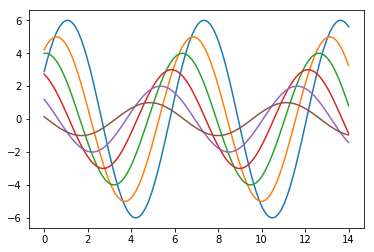

In [14]:
sinplot()

### SEABORN DEFAULTS

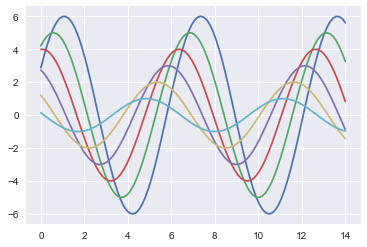

In [15]:
sns.set() # set default
sinplot()

### DISTRIBUTION PLOTS

In [10]:
tips = sns.load_dataset('tips')

In [11]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


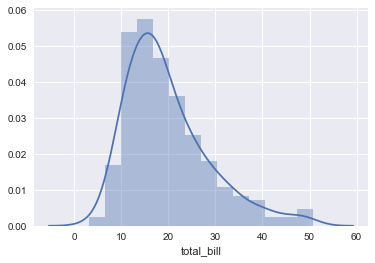

In [16]:
sns.distplot(tips['total_bill'])

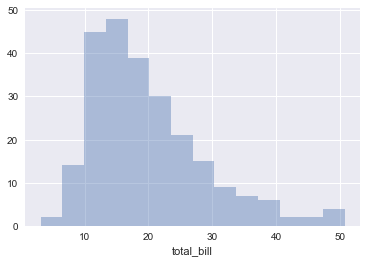

In [17]:
sns.distplot(tips['total_bill'], kde=False)

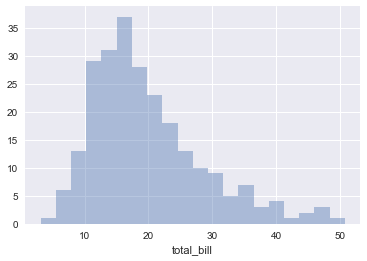

In [18]:
sns.distplot(tips['total_bill'], kde=False, bins=20)

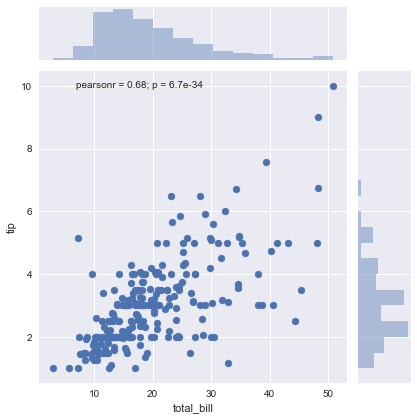

In [19]:
sns.jointplot(x='total_bill', y='tip', data=tips)

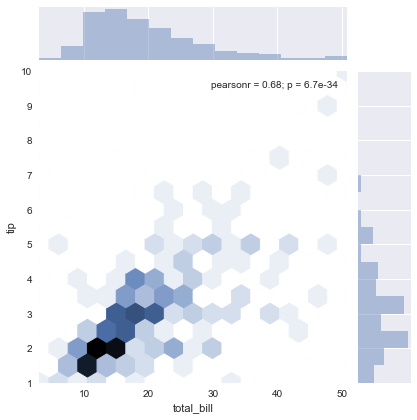

In [21]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex');

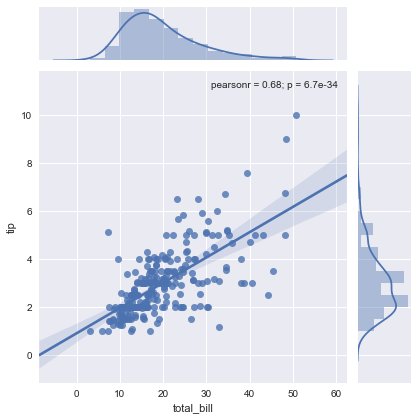

In [22]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg');

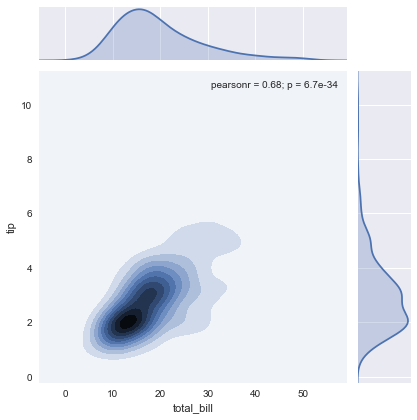

In [23]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde');

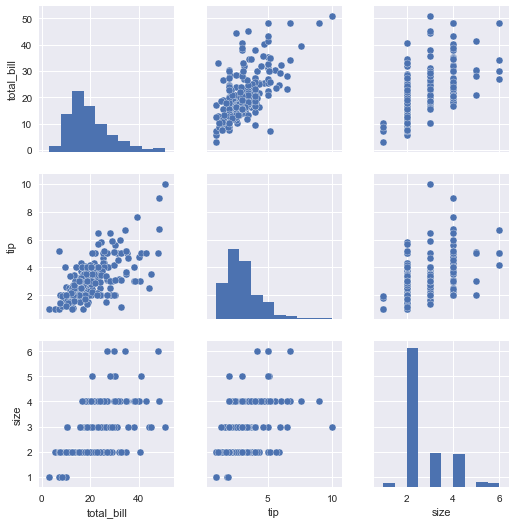

In [25]:
sns.pairplot(tips);

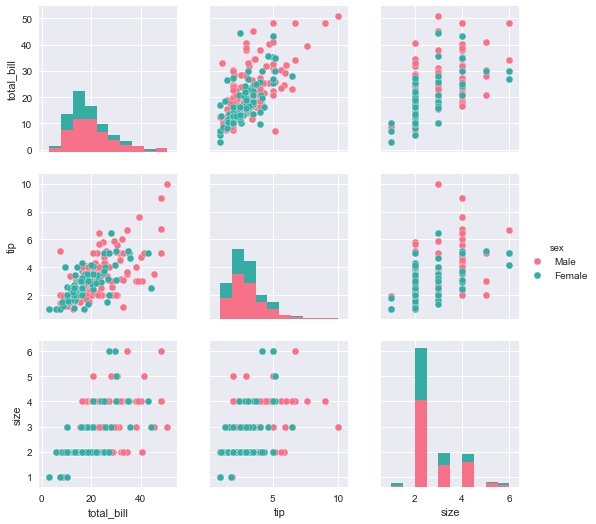

In [29]:
sns.pairplot(tips, hue='sex', palette='husl'); # pass in a categorical like gender

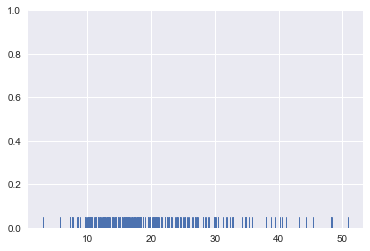

In [31]:
sns.rugplot(tips['total_bill']);

In [34]:
dataset = np.random.randn(25)

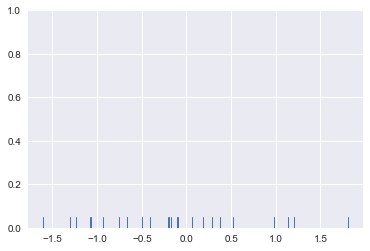

In [36]:
sns.rugplot(dataset);

(0, 1)

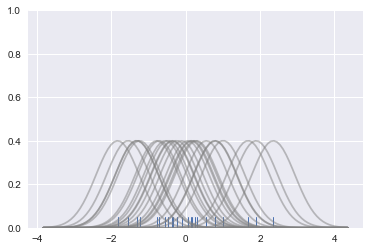

In [38]:
#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

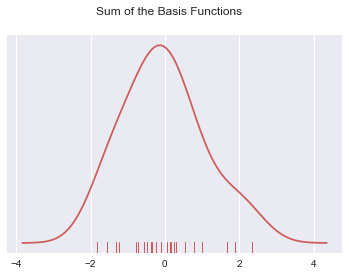

In [39]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

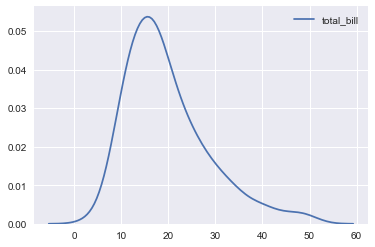

In [41]:
sns.kdeplot(tips['total_bill']);

### Categorical Data

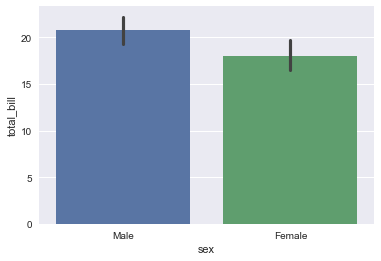

In [42]:
sns.barplot(x='sex',y='total_bill',data=tips)

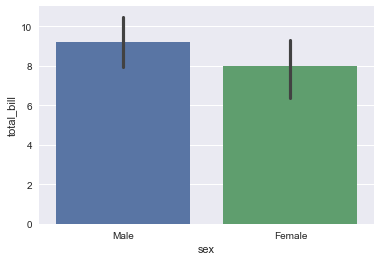

In [43]:
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) # look at STDev for variance within groups

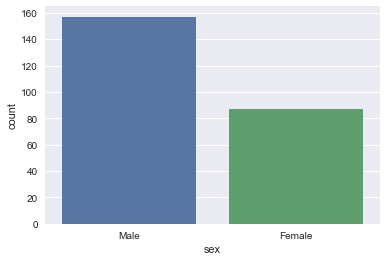

In [45]:
sns.countplot(x='sex', data=tips); # like barplot but the estimator is count (y axis is set to count)

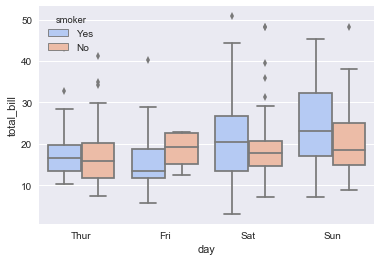

In [50]:
sns.boxplot(x='day',y='total_bill', data=tips, hue='smoker', palette='coolwarm');

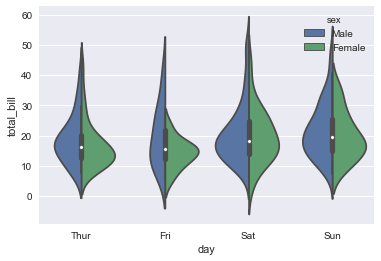

In [53]:
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True);

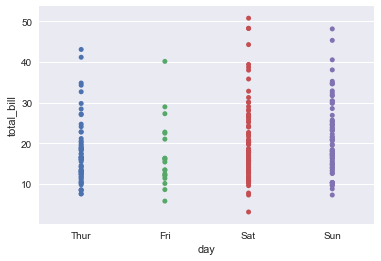

In [55]:
sns.stripplot(x='day', y='total_bill', data=tips);

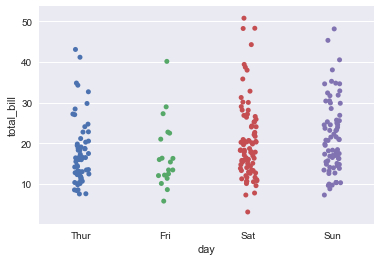

In [56]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True);

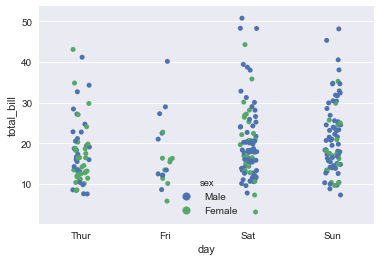

In [57]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex');

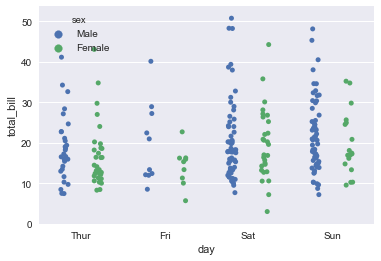

In [59]:
sns.stripplot(x='day', y='total_bill', data=tips, jitter=True, hue='sex', dodge=True);

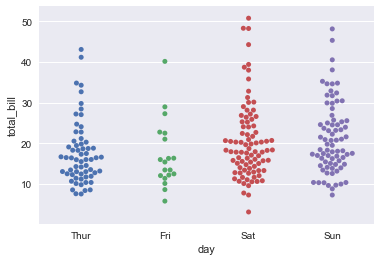

In [62]:
sns.swarmplot(x='day', y='total_bill', data=tips); # like a stripplot combined with a violin plot

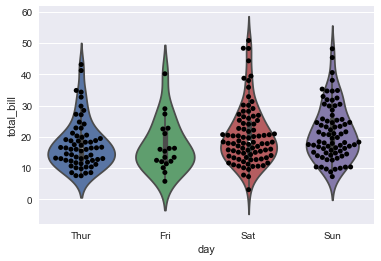

In [68]:
sns.violinplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, color='black');

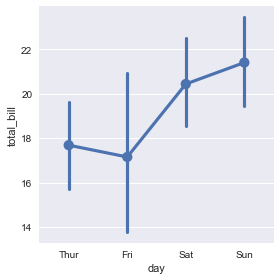

In [70]:
sns.factorplot(x='day', y='total_bill', data=tips);

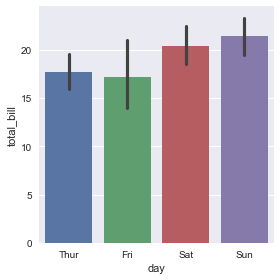

In [72]:
sns.factorplot(x='day', y='total_bill', data=tips, kind='bar');

### Matrix plotting

In [74]:
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')

In [75]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [78]:
tips.corr() # we need the rows to have variables as well so we apply a correlation 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [76]:
tc = tips.corr() # get the correlations 

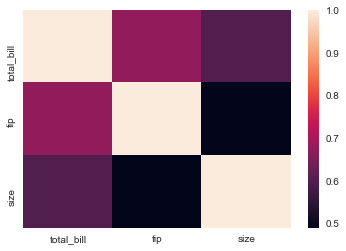

In [77]:
sns.heatmap(tc)

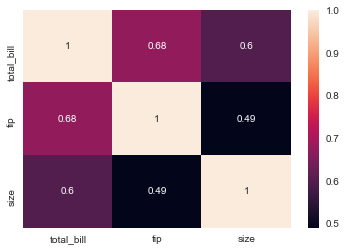

In [80]:
sns.heatmap(tc, annot=True);

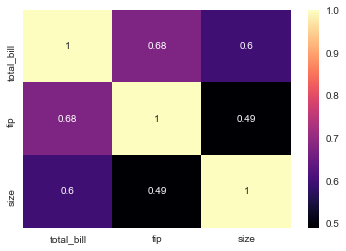

In [84]:
sns.heatmap(tc, annot=True, cmap='magma');

In [120]:
fp = flights.pivot_table(index='month', columns='year', values='passengers')

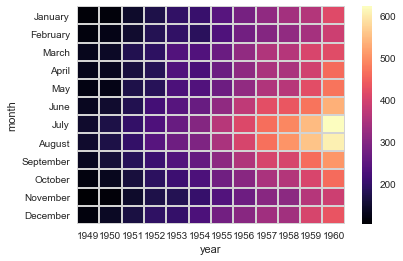

In [121]:
sns.heatmap(fp,cmap='magma', linecolor='lightgrey', linewidth=1);

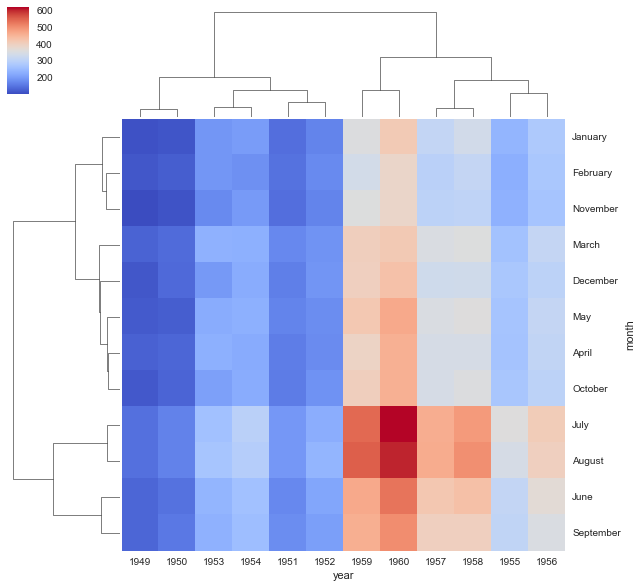

In [103]:
sns.clustermap(fp, cmap='coolwarm');

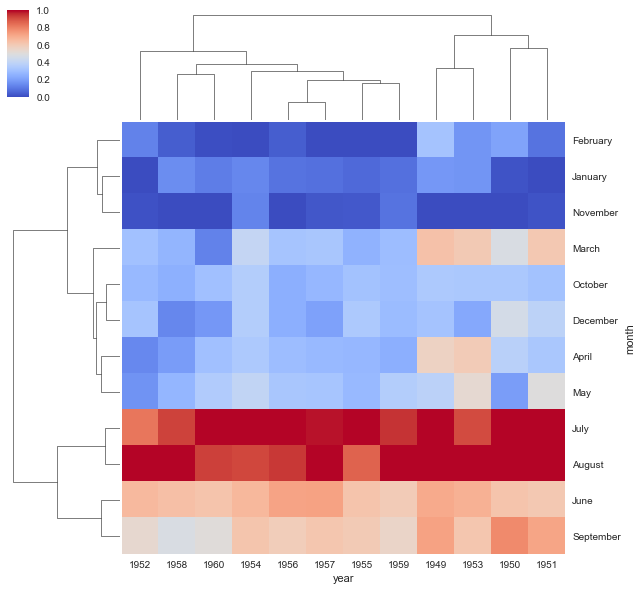

In [104]:
sns.clustermap(fp, cmap='coolwarm', standard_scale=1);

### GRIDS

In [106]:
iris = sns.load_dataset('iris')

In [107]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [108]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

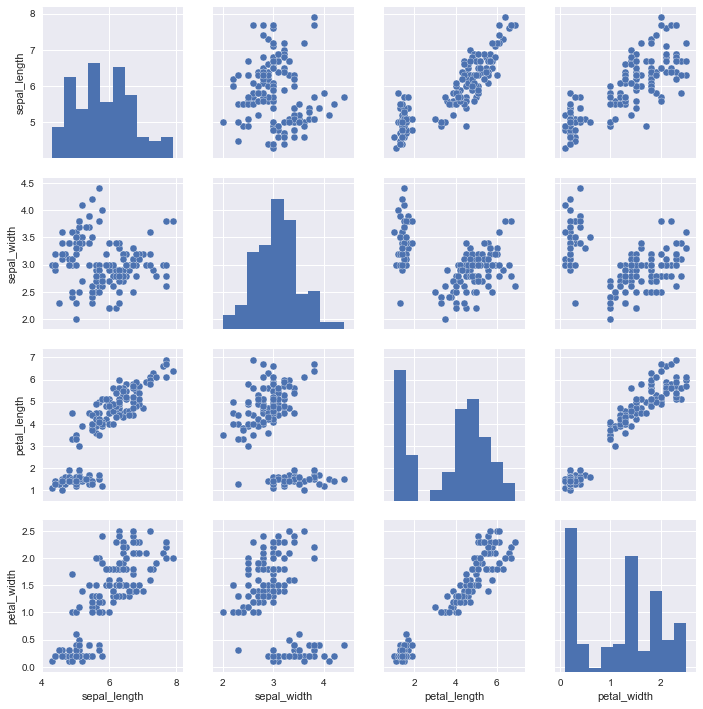

In [109]:
sns.pairplot(iris)

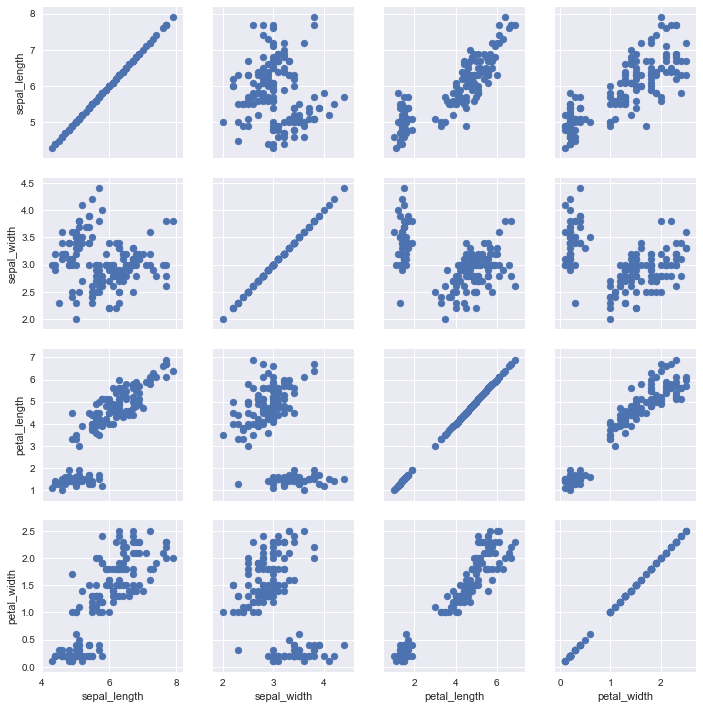

In [111]:
g = sns.PairGrid(iris)
g.map(plt.scatter)

/usr/local/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


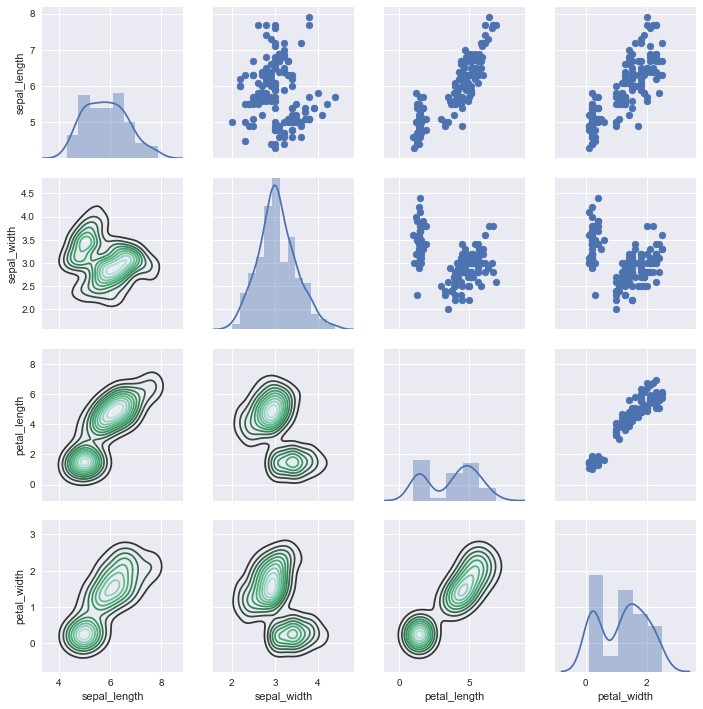

In [122]:
g = sns.PairGrid(iris)
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

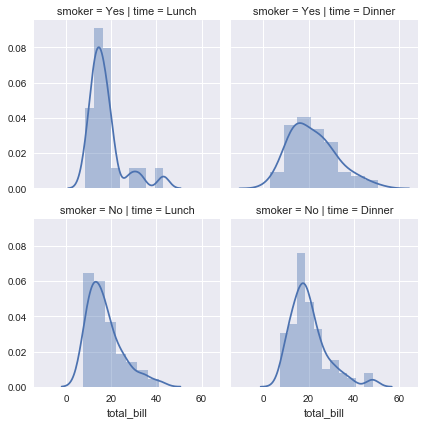

In [123]:
f = sns.FacetGrid(data=tips, col='time', row='smoker')
f.map(sns.distplot,'total_bill');

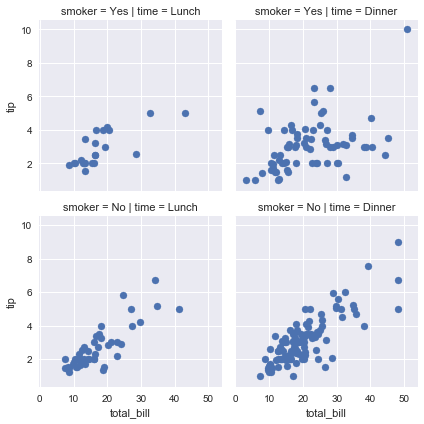

In [124]:
f = sns.FacetGrid(data=tips, col='time', row='smoker')
f.map(plt.scatter,'total_bill', 'tip');

### REGRESSION PLOTS

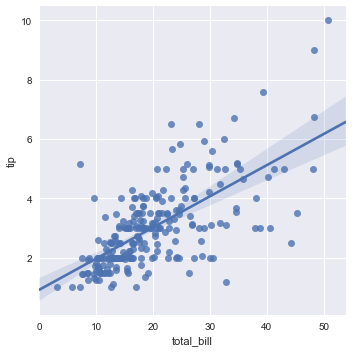

In [127]:
sns.lmplot(x='total_bill', y='tip', data=tips);

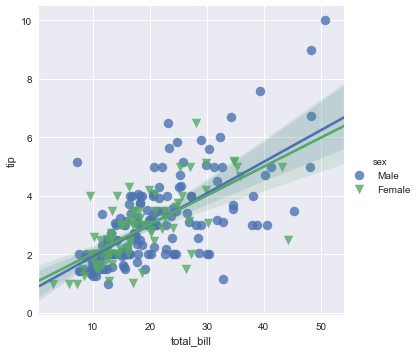

In [136]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', markers=['o','v'],
          scatter_kws={'s':90});

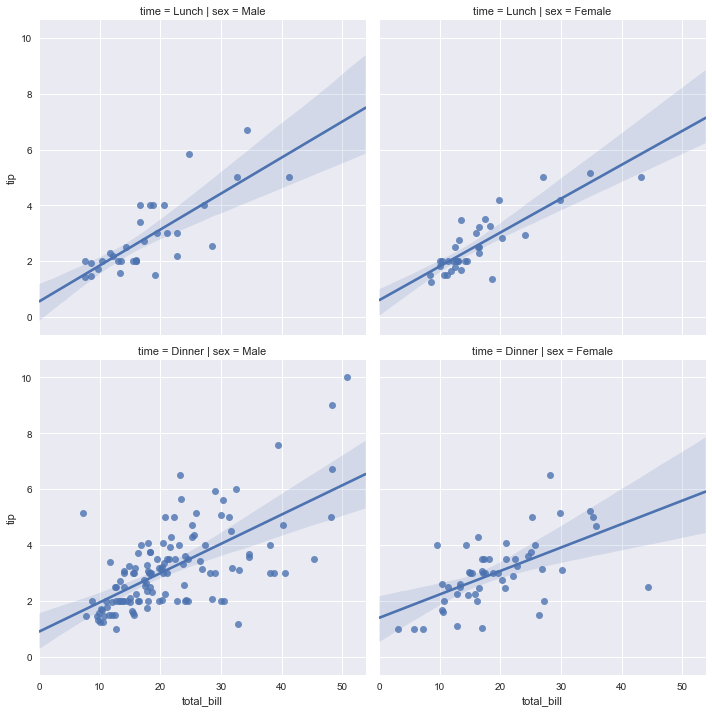

In [139]:
sns.lmplot(x='total_bill', y='tip', data=tips,col='sex', row='time');

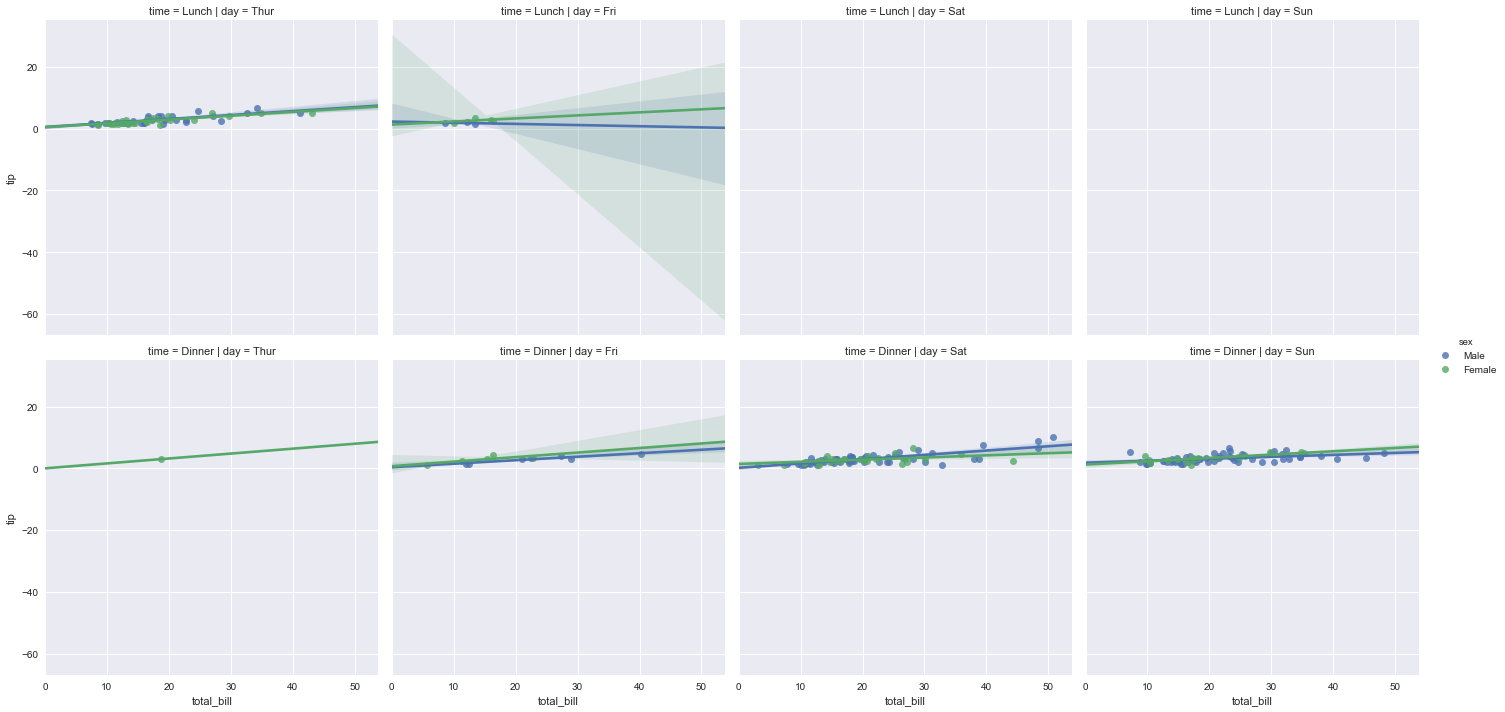

In [140]:
sns.lmplot(x='total_bill', y='tip', data=tips,col='day', row='time', hue='sex');

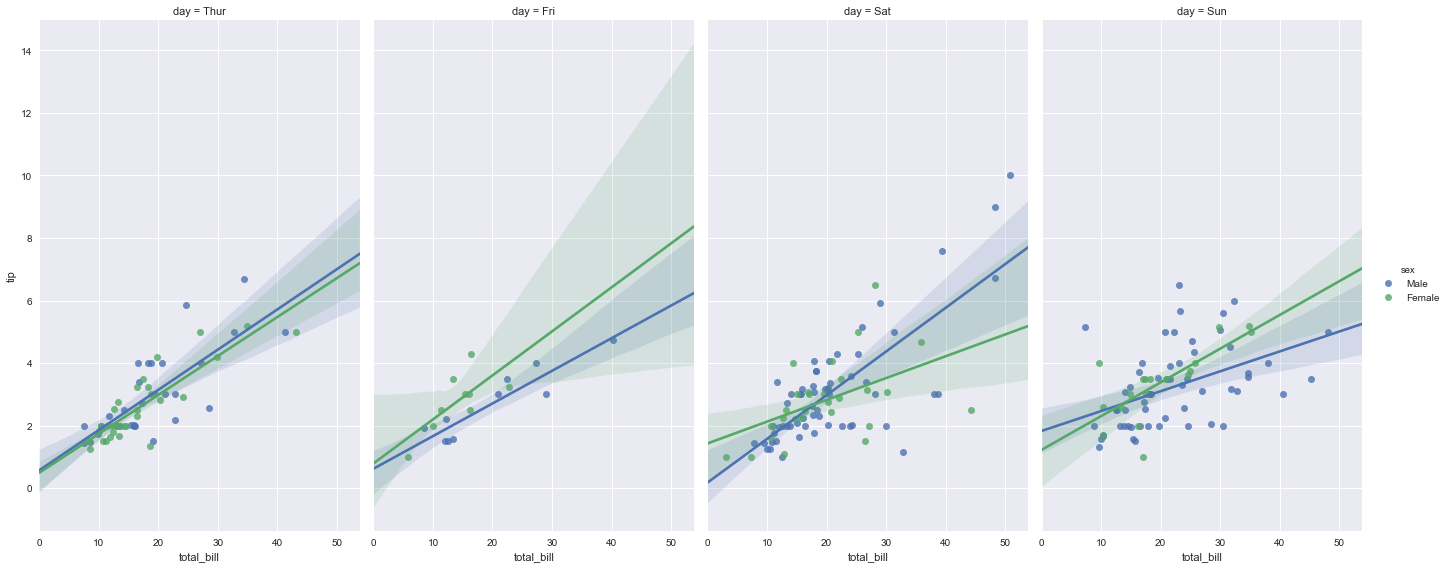

In [142]:
sns.lmplot(x='total_bill', y='tip', data=tips,col='day', hue='sex',
          aspect=0.6, size=8);

### STYLE AND COLOR

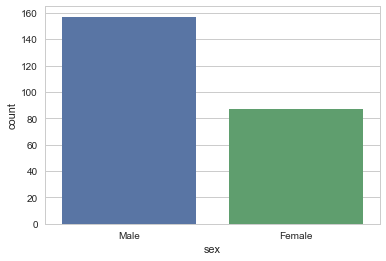

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='sex', data=tips)

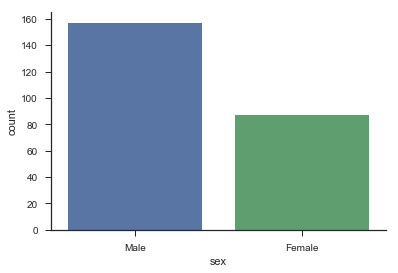

In [146]:
sns.set_style('ticks')
sns.countplot(x='sex', data=tips)
sns.despine()

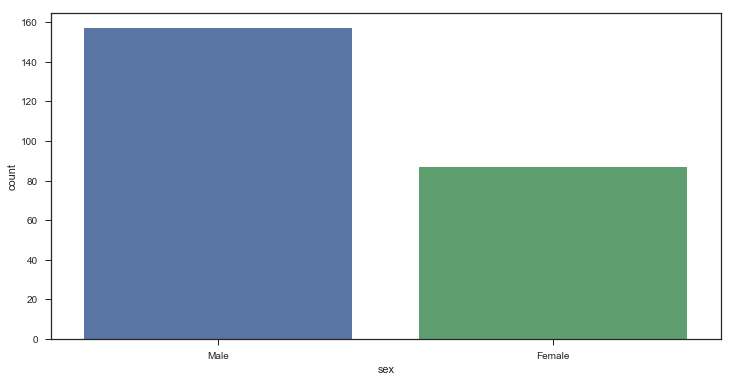

In [149]:
plt.figure(figsize=(12,6))
sns.countplot(x='sex', data=tips)

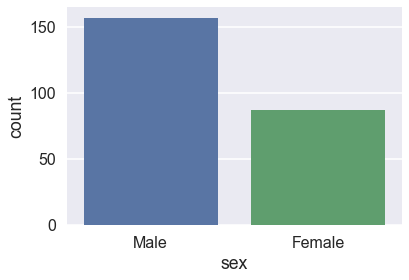

In [157]:
sns.set_style(style='darkgrid')
sns.set_context(context='poster', font_scale=1)
sns.countplot(x='sex', data=tips)

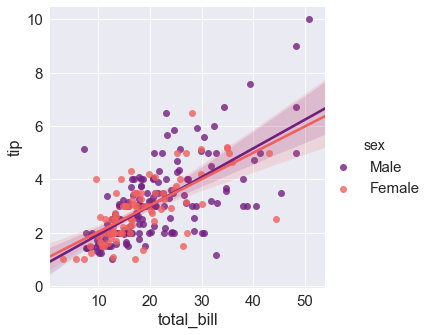

In [165]:
sns.set_context(context='notebook', font_scale=1.5)
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', palette='magma')